Ryan Malmfelt

ITCS 3162

11/20/2024


Project 4: Clustering

WORLD HAPPINESS REPORT


The World Happiness Report offers insights into how various economic, social, and political factors influence happiness across different nations. This project aims to explore clusters within these happiness scores to understand whether certain countries share common characteristics that influence their happiness rankings. Some Research Questions This project could focus on are there identifiable groups of countries that share similar happiness factors? How do economic indicators (like GDP per capita) compare across clusters? Can clusters reveal unique regional or cultural factors impacting happiness? This approach will allow this project to investigate underlying patterns in happiness across countries and regions, and clustering will enable grouping countries with similar scores and factors, offering insight into possible trends and influences on happiness.


Clustering is a technique in unsupervised machine learning that groups data points with similar characteristics together. The objective is to find inherent patterns or structures in the data, often by grouping points in a way that makes each group, or cluster, internally cohesive and distinctly separate from other clusters. Clustering is especially useful when there are no predefined labels in the data, as it helps reveal hidden relationships or segment data into meaningful categories.

Different algorithms achieve clustering in different ways. The two common approaches include k-means clustering and agglomerative clustering. First starting with K-Means Clustering.

K-Means Clustering:

K-means clustering aims to partition data into a fixed number of clusters 

The algorithm starts by randomly initializing k centroid points in the data space.

Each data point is then assigned to the nearest centroid, forming k clusters.

After all points are assigned, the centroids are recalculated as the mean of all points in each cluster.

The algorithm iterates, reassigning points to the nearest centroids and updating centroids until assignments stabilize or a maximum number of iterations is reached.

The result is a set of clusters where each point is closer to its own cluster’s centroid than to any other centroid.

Next is Agglomerative:

Agglomerative (Hierarchical) Clustering:

Hierarchical clustering builds a hierarchy of clusters by progressively merging or splitting clusters.

In agglomerative clustering, each data point starts as its own cluster.

Clusters are merged iteratively based on their similarity, often measured by a distance metric such as Euclidean distance.

The merging process continues until a single cluster is formed or a predefined number of clusters is reached.

A common output is a dendrogram, which visually represents the hierarchy, allowing the user to choose a clustering level by cutting the dendrogram at a specific height.


Application of Clustering:

In the context of this World Happiness Report project, clustering could reveal groups of countries that share similar happiness indicators (e.g., GDP, social support, life expectancy), providing insights into how specific factors contribute to overall happiness across regions or cultures. By using k-means or hierarchical clustering, This project can identify clusters that might represent countries with similar economic conditions, social environments, or political stability.


INTRODUCING THE DATA:

The dataset is publicly available on Kaggle and is a part of the World Happiness Report collection. It can be accessed here on Kaggle. This dataset is derived from the World Happiness Report published by the Sustainable Development Solutions Network (SDSN), an initiative of the United Nations. The report ranks countries by their levels of happiness based on various factors such as economic and social conditions, and the dataset reflects these rankings for a given year. 

This Kaggle dataset contains a collection of happiness scores and various socio-economic indicators that are believed to influence happiness. The data spans multiple years, allowing for the analysis of trends over time. This project will focus on the 2019 dataset as this is the most recently updated dataset.

Key Features Include:

Country: The name of the country or region.

Region: The geographical region of the country, such as North America, Europe, etc.

Happiness Rank: The rank of the country in terms of happiness based on its overall score.

Happiness Score: The overall score for happiness in a given country, derived from survey data where citizens rank their well-being.

GDP per Capita: The economic output per person, adjusted for purchasing power parity (PPP). Higher GDP per capita is often associated with higher happiness.

Social Support: A measure of how much people feel they can rely on their social networks (family, friends, and community) in times of need.

Healthy Life Expectancy: An estimate of the number of years a person can expect to live in good health, which is influenced by healthcare quality, nutrition, and living standards.

Freedom to Make Life Choices: A measure of personal freedom, representing how much people feel they can make decisions about their own lives, including their career, relationships, and personal aspirations.

Generosity: A measure of how much people in a country report contributing to charity and engaging in other generous behaviors.

Perceptions of Corruption: The degree to which people perceive corruption in their government and businesses, which can negatively affect overall happiness and trust in institutions.

This dataset is helpful for identifying patterns and performing clustering analysis to group countries with similar happiness scores and related indicators. This project can analyze how specific features like GDP, social support, or freedom correlate with happiness across different countries or regions.


DATA UNDERSTANDING AND VISUALIZATION:

The data understanding and visualization step is crucial for uncovering insights about the dataset and helping form hypotheses before moving on to modeling. By visually exploring the data, this project can identify patterns, correlations, that will chose features for clustering or other analyses. Here's how you can approach this step and its connection to your modeling process:

Exploring the Data with Visualizations

Summary Statistics: Before diving into visualizations, it's useful to look at summary statistics for each feature (mean, median, min, max, standard deviation). This can give you an initial understanding of the range and distribution of values.

Scatter Plots: To explore relationships between two continuous variables (like GDP per capita and happiness score), scatter plots can help you visualize the linear or non-linear trends.

Histograms and Box Plots: Use histograms to understand the distribution of continuous variables (e.g., happiness scores, GDP). Box plots can also help identify outliers and the spread of data.

A pair plot helps to visualize the pairwise relationships between multiple variables at once. This is particularly useful to see how different features are correlated with each other and identify any potential clusters or patterns. This will show scatter plots for each pair of selected features and help you see how features relate to each other in pairs.

A heatmap is an excellent way to display a correlation matrix. This helps you see how strongly features correlate with each other. A high correlation between certain features could suggest which ones are most important for clustering. This will show the correlations between selected features and allow you to identify which features are highly correlated, which could influence your modeling decisions.




In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_world = pd.read_csv(r'C:\Users\malmf\AppData\Local\Temp\a52dba02-9e23-414f-bb18-261c243a3a3a_archive (11).zip.archive (11).zip\2019.csv')
df_world.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [11]:
df_world.describe()
df_world.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

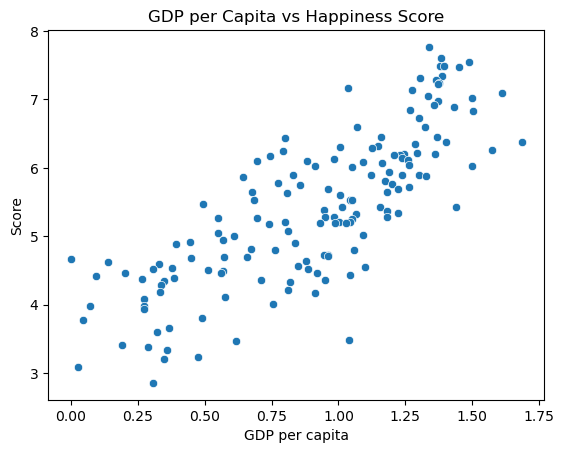

In [12]:
sns.scatterplot(x='GDP per capita', y='Score', data=df_world)
plt.title('GDP per Capita vs Happiness Score')
plt.show()

In order to get a better understanding I first created a scatter plot to show the relationship between happiness score and GDP per capita. the data As you can see based off of this scatter plot We see a pretty positive correlation. The higher a country's GDP per capita is, the higher their happiness score is going to be. 

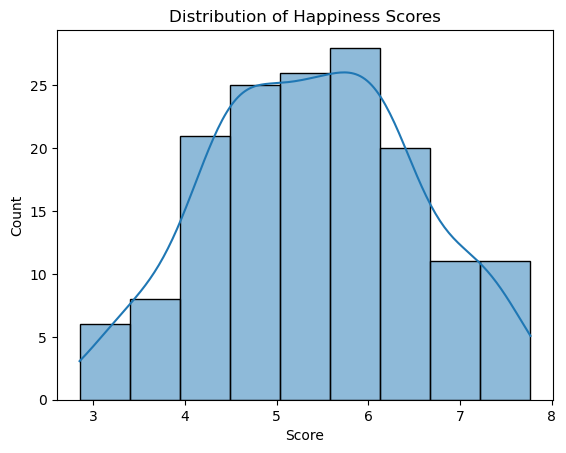

In [13]:
sns.histplot(df_world ['Score'], kde=True)
plt.title('Distribution of Happiness Scores')
plt.show()

The next thing I looked at is a histogram/plot that shows the distribution of happiness scores. Most of the countries have a happiness score of 6. This is actually a pretty evenly distributive plot with it not being ti right skewed or left skewed.

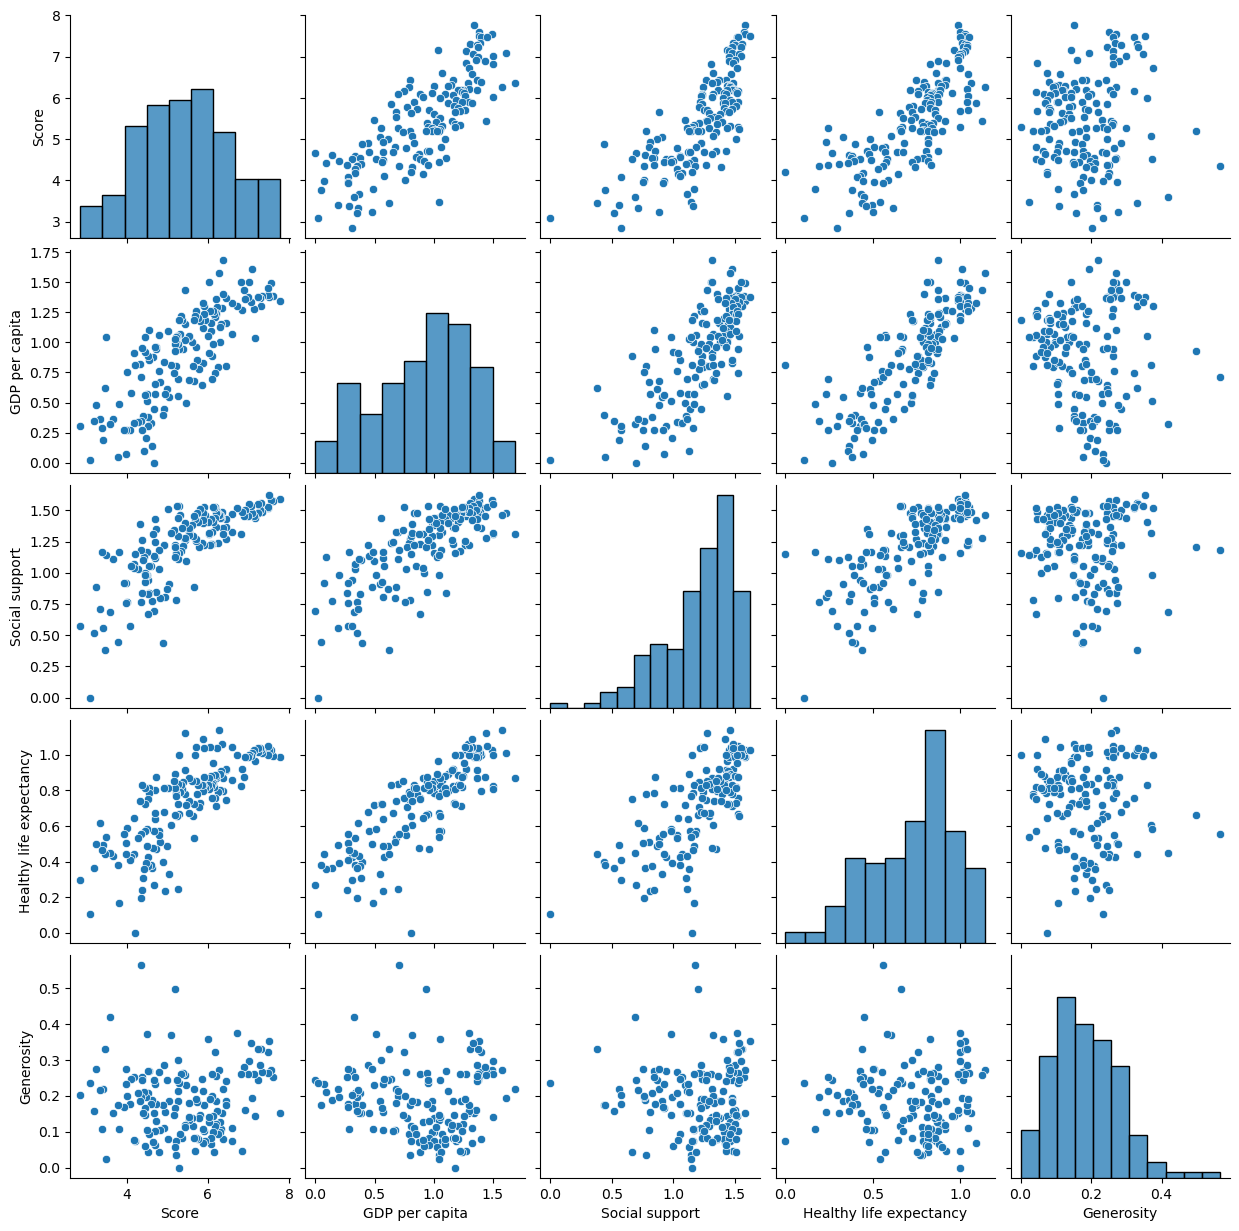

In [14]:
sns.pairplot(df_world[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Generosity']])
plt.show()

The next plot I created in order to get a better understanding was a pairplot to show the different relationships between the features included in the dataset. I looked at score(happiness score), GDP per capita, social support, Healthy life expentancy, and Generosity.Looks like score has a pretty positive correlation with everything besides generosity. It actually lookes like everything has a positive correlation with each other feature besides generosity.

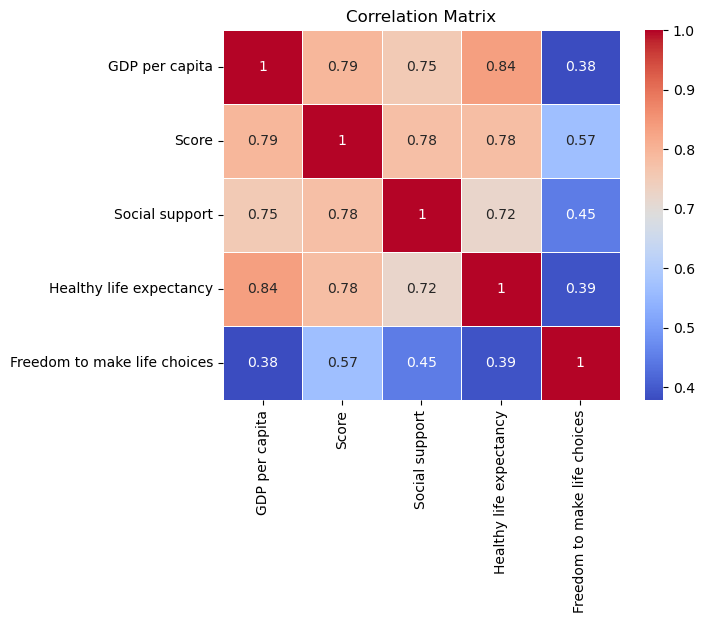

In [15]:
correlation_matrix = df_world[['GDP per capita', 'Score', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The last thing I wanted to look at was a correlation matrix to find relationships between features. Looking at these results it seems like its pretty similiar to the pairplot above. All the features in here have a positive correlation with each other besides the freedom to make life choices.

DATA PREPROCESSING:

I began my data preprocessing by making sure the usability of the dataset I chose was high. I wanted to check the usability of the dataset because if the usability of the dataset is low, then how are you gonna know if you're going to get good and accurate results?   The usability of the dataset I pulled from Kaggle was 8.53/10; so the dataset is very well functional and good to use for the problems that I intend to answer. Next I wanted to make sure that I was able to pull the CSV file and copy it into my notebook in order to have all the features that the file included. This step is needed to make sure you have the correct data in order to answer your questions. 

In [17]:
print(df_world.isnull().sum())
# Impute with the mean for numeric features


Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [19]:
df = df_world.drop(columns=['Country or region'])

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Choose the number of components based on explained variance
pca_df = pca.fit_transform(scaled_df)

In [30]:
from scipy import stats
z_scores = stats.zscore(df)
df = df[(z_scores < 3).all(axis=1)]  # Remove rows where Z-score > 3 (outliers)

c:\Users\malmf\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\malmf\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\malmf\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\malmf\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

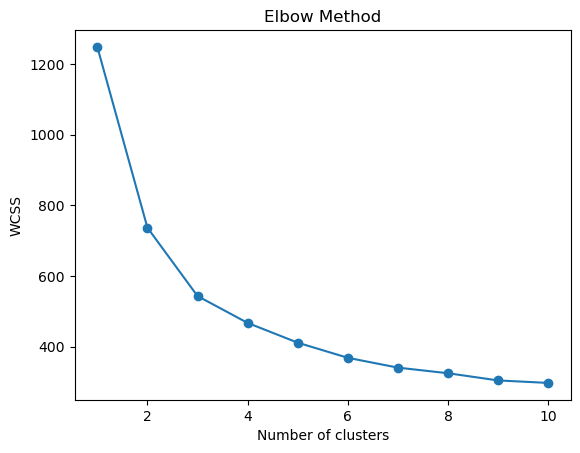

c:\Users\malmf\Downloads\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Train K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Add cluster labels to the original dataframe
df_world['Cluster'] = clusters

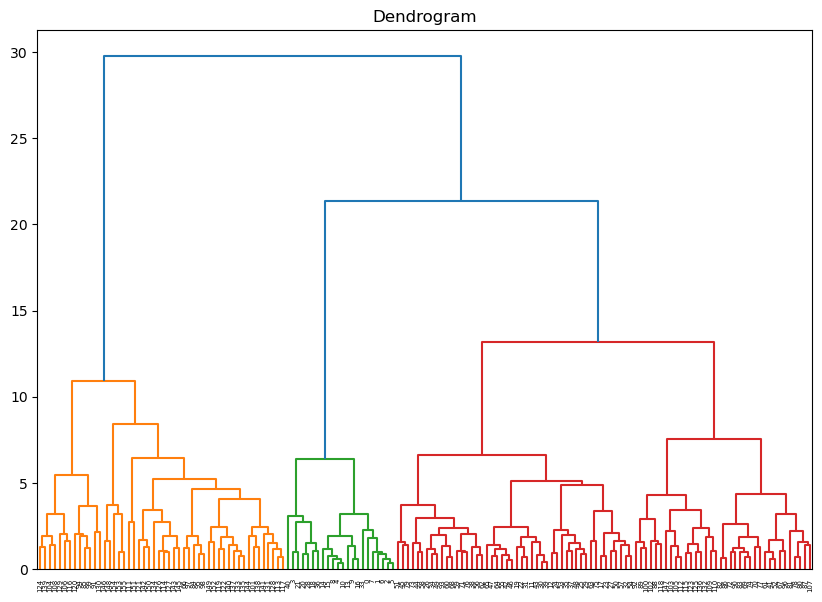

In [28]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Create a dendrogram to decide the number of clusters
linked = linkage(scaled_df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.show()

# Train Agglomerative Clustering with the chosen number of clusters
agglomerative = AgglomerativeClustering(
    n_clusters=3, 
    metric='euclidean',  # Specify the distance metric
    linkage='ward'       # Linkage method
)
clusters = agglomerative.fit_predict(scaled_df)

# Add cluster labels to the original dataframe
df_world['Cluster'] = clusters